# ME 599 HW1#
Jan 10, 2018
Tianqi Li

## Problem 2
Compute and store an array of n values equally spaced over the interval [0,2*Pi]:

    a. Write a function using a for() loop to compute the values and store them in a
    Numpy array.
    b. Use Numpy’s linspace() function to perform the same task.
    c. Plot the values as a function of index number for n=11 using matplotlib.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### solution of a

In [3]:
def saperate(n):
    '''
    This function is to compute and store an array of
    n values equally spaced over the interval [0,2*Pi],
    input: n
    output: a
    '''
    a = np.zeros(n);
    for i in range(n):
        a[i] = np.pi * (i / (n - 1))
    return a
a = saperate(5)
print(a)

[ 0.          0.78539816  1.57079633  2.35619449  3.14159265]


### solution of b

In [4]:
a = np.linspace(0, np.pi, 5)
print(a)


[ 0.          0.78539816  1.57079633  2.35619449  3.14159265]


### solution of c

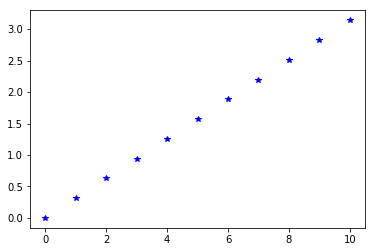

In [5]:
plt.plot(range(11), saperate(11), 'b*')

## Problem 3
Write functions to perform the following computations with 1D arrays of values. Create Numpy array to store your output (i.e., do not worry about doing “in-place” operations where you write the result into one of the input arrays), and be sure to include comments to describe the inputs and outputs of your functions:

    a. Scalar multiplication
    b. Component-wise addition
    c. Evaluate the linear function y = c*x + d (which combines parts 1a and 1b)
    d. Component-wise multiplication
    e. Inner product
    f. Euclidean norm

### solution of a

In [6]:
array_to_input = np.array([1, 2, 3.0])

In [7]:
def sca_mul(sca, array):
    # this function calculates scalar multiplication of a scalar and 
    # an array
    # inputs:
        # sca: the scalar to multiple
        # array: the array to multiple
    # output: 
        #prod: scalar multiplication product
    prod = sca * array
    return prod
print(sca_mul(3, array_to_input))

[ 3.  6.  9.]


### solution of b

In [8]:
def com_wis_add(first_array, second_array):
    # this function calcuates the component-wise addition of 2 arrays
    # inputs:
        # first_array: the first addend
        # second_array: the second addend
    # output: 
        # summ: sum of component-wise addition
    summ = np.add(first_array, second_array)
    return summ
print(com_wis_add(array_to_input, array_to_input))

[ 2.  4.  6.]


### solution of c

In [9]:
def get_function(c, x, d):
    # this function evaluates the linear function y = c*x + d
    # inputs:
        # c: the scalar
        # x: the first addend array
        # d: the second addend array
    # output: 
        # y: sum of the linear function
    summ = com_wis_add(sca_mul(c, x), d)
    return summ
print(get_function(0.5, array_to_input, array_to_input))

[ 1.5  3.   4.5]


### solution of d

In [10]:
def com_wis_mult(first_array, second_array):
    # this function calcuartes the component-wise mutiplication of 2 arrays
    # inputs:
        # first_array: the first multiplicand array
        # second_array: the second multiplicand array
    # output: 
        # prod: product of component-wise multiplication
    prod = np.multiply(first_array, second_array)
    return prod
print(com_wis_mult(array_to_input, array_to_input))

[ 1.  4.  9.]


### solution of e

In [11]:
def inn_prod(first_array, second_array):
    # this function calcuates the inner product of 2 arrays
    # inputs:
        # first_array: the first multiplicand array
        # second_array: the second multiplicand array
    # output: 
        # prod: inn product of component-wise multiplication
    prod = np.dot(first_array, second_array)
    return prod
print(inn_prod(array_to_input, array_to_input))

14.0


### solution of f

In [4]:
import numpy as np
def get_norm(array):
    # this function calcuates the norm of 1 arrays
    # inputs:
        # first_array: the first multiplicand array
        # second_array: the second multiplicand array
    # output: 
        # prod: inn product of component-wise multiplication
    prod = np.linalg.norm(array)
    return prod
array_to_input = np.array([0,1,2])
print(get_norm(array_to_input))

2.2360679775


In [6]:
prod = np.linalg.norm(np.array([0,1,2]))

In [8]:
prod.dtype

dtype('float64')

## Problem 4

Using Numba, create parallel versions of your functions from problem 2. Identify parts
that cannot be immediately parallelized and write serial implementations as needed.

In [21]:
from numba import cuda


In [22]:

import numpy as np
import math
from numba import cuda
TPB = 32
@cuda.jit ( device = True )
def sFunc ( x0 ):
return ( 1. - 2. * math.sin ( np.pi * x0 )** 2. )
@cuda.jit ( ' void ( float32 [:] , float32 [:]) ')
def sKernel ( d_f , d_x ) :
i = cuda.grid (1)
n = d_x.size
if i < n:
d_f [i] = sFunc ( d_x [i ])
def sArray ( x):
n = x.size
d_x = cuda.to_device ( x)
d_f = cuda.device_array (n , dtype = np. float32)
gridDim = ( n + TPB - 1)/ / TPB
blockDim = TPB
sKernel [ gridDim , blockDim ]( d_f , d_x )
return d_f.copy_to_host ()@cuda.jit


SyntaxError: unexpected EOF while parsing (<ipython-input-22-8a733bc400bd>, line 1)

## Problem 5

Write and execute a program to test your functions as follows:

   a. Create input arrays u and v of length n.
    Start with n=5.
    
        i. Set each entry in v equal to 1.
        ii. Set each entry in u to 1/(n-1), then reset the first entry to 1 (remember that means u[0]=1).
        iii. Compute z=-u and the norm of u+z. Inspect and verify your results.
        iv. Compute the dot product (inner product) of u and v. Inspect and verify your results.
        v. Create a “reversed dot” product in which you sum the contributions in reverse order. Inspect and verify your results when computing the dot product of u and v using this new function.

In [19]:
def prob5_fun(n):
    '''
    This function is defined to create a function in P5.a'''
    # i. Set each entry in v equal to 1.    
    v = np.ones(n)
    
    # ii. Set each entry in u to 1/(n-1), then reset the first 
    # entry to 1 (remember that means u[0]=1).
    
    u = np.ones(n)
    u.fill(1 / (n-1))
    u[0] = 1
    
    #iii. Compute z=-u and the norm of u+z. Inspect and verify 
    #your results.
    z = -u
    norm = np.linalg.norm(u + z)
    
    #iv. Compute the dot product (inner product) of u and v. Inspect 
    #and verify your results.
    dot_pro = np.dot(u, v)
    
    
    #v. Create a “reversed dot” product in which you sum the 
    #contributions in reverse order. Inspect and verify your results 
    #when computing the dot product of u and v using this new function.
    sum_ = 0
    for i in range(len(u)):
        sum_ += u[- (i + 1)] * v[- (i + 1)]
    
    return dot_pro, sum_
print(prob5_fun(10000000))

(2.0000000000363523, 2.0000000002298961)


In [15]:
u = np.ones(4)

In [16]:
u.fill(1/5)

In [17]:
u

array([ 0.2,  0.2,  0.2,  0.2])

In [3]:
! export NUMBA_ENABLE_CUDASIM=1

In [6]:
import numpy as np
import math
from numba import cuda
TPB = 32
@cuda.jit ( device = True )
def sFunc ( x0 ):
    return ( 1. - 2. * math.sin ( np.pi * x0 )** 2. )
@cuda.jit ( ' void ( float32 [:] , float32 [:]) ')
def sKernel ( d_f , d_x ) :
    i = cuda.grid (1)
    n = d_x.size
    if i < n:
        d_f [i] = sFunc ( d_x [i ])
    
def sArray ( x):
    n = x.size
    d_x = cuda.to_device ( x)
    d_f = cuda.device_array (n , dtype = np. float32)
    gridDim = ( n + TPB - 1)/TPB
    blockDim = TPB
    sKernel [ gridDim , blockDim ]( d_f , d_x )
    return d_f.copy_to_host ()

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBAPRO_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

In [17]:
def save_array(n):
    y = np.zeros(n)
    for i in range(n):
        y[i] = np.pi * (i/(n-1))
    return y